In [3]:
import yt
from yt import YTArray
from yt import YTQuantity

from astropy import constants as const

import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.colors import SymLogNorm, LogNorm

import palettable
import plotting_tools as pt
import yt_functions as ytf


In [29]:


def doit(ds, field = 'drho'):
    dims = ds.domain_dimensions
    nx, ny, nz = dims

    Kk = np.zeros( (nx//2+1, ny//2+1, nz//2+1))
    Kk = fft_comp(ds, field)

    # wavenumbers in units of box length
    L = np.array([1.0, 1.0, 1.0])
    
    kx = np.fft.rfftfreq(nx)*nx/L[0]
    ky = np.fft.rfftfreq(ny)*ny/L[1]
    kz = np.fft.rfftfreq(nz)*nz/L[2]

    # physical limits to the wavenumbers
    kmin = np.min(1.0/L)
    kmax = np.min(0.5*np.array(dims)/L)
    
    
    kbins = np.arange(kmin, kmax, kmin)
    N = len(kbins)

    # bin the Fourier KE into radial kbins
    kx3d, ky3d, kz3d = np.meshgrid(kx, ky, kz, indexing="ij")
    k = np.sqrt(kx3d**2 + ky3d**2 + kz3d**2)

    whichbin = np.digitize(k.flat, kbins)
    ncount = np.bincount(whichbin)

    P_spectrum = np.zeros(len(ncount)-1)

    for n in range(1,len(ncount)):
        P_spectrum[n-1] = np.sum(Kk.flat[whichbin==n])

    #k = 0.5*(kbins[0:N-1] + kbins[1:N])
    k = kbins[1:N]
    P_spectrum = P_spectrum[1:N]
    return k, P_spectrum


def fft_comp(ds, field, level = 0 ):
    cube = ds.covering_grid(level, left_edge=ds.domain_left_edge,
                            dims=ds.domain_dimensions)

    rho = cube[('gas', 'density')].d        
    if field == 'rho':
        fft_field = rho
    elif field == 'drho':
        drho = np.ndarray(shape = rho.shape)
        for i in range(len(rho)):
            rho_slice = rho[:, :, i] 
            rho_ave = np.mean(rho_slice)
            drho[:, :, i]  = (rho_slice - rho_ave) / rho_ave
        fft_field = drho

    nx, ny, nz = rho.shape

    # do the FFTs -- note that since our data is real, there will be
    # too much information here.  fftn puts the positive freq terms in
    # the first half of the axes -- that's what we keep.  Our
    # normalization has an '8' to account for this clipping to one
    # octant.
        
    ru = np.fft.fftn(fft_field)[0:nx//2+1,0:ny//2+1,0:nz//2+1]
    ru = 8.0*ru/(nx*ny*nz)

    return np.abs(ru)**2


i = 0
ds = yt.load("../../simulations/isothermal_tctf_3.0/DD%04d/DD%04d"%(i,i))
doit(ds, field = 'rho')
ds = yt.load("../../simulations/isothermal_tctf_3.0_beta_4.0/DD%04d/DD%04d"%(i,i))
doit(ds)
ds = yt.load("../../simulations/isothermal_tctf_3.0_beta_256.0_k_4.0/DD%04d/DD%04d"%(i,i))
doit(ds)
ds = yt.load("../../simulations/isothermal_tctf_3.0_beta_256.0_k_32.0/DD%04d/DD%04d"%(i,i))
doit(ds)
def plot_power_spectrum(field, output_list = [0], model = 'isothermal', tctf_list = [1], \
                        beta_list = ['inf'], k = 4, label_list = None, \
                        work_dir = '../../simulations'):

    fig, ax = plt.subplots(figsize = (6, 6))
    
    if label_list == None:
        label_list = tctf_list
    for output, tctf, beta, label in zip(output_list, tctf_list, beta_list, label_list):
        # load the simulation
        sim_loc = '%s/%s_tctf_%.1f'%(work_dir, model, tctf)
        if beta != 'inf':
            sim_loc += '_beta_%.1f'%(beta)
            if beta == 256:
                sim_loc += '_k_%.1f'%(k)
        ds = yt.load('%s/DD%04d/DD%04d'%(sim_loc, output, output))
        
        k, P_k = doit(ds, field)
        ax.loglog(k, P_k, label = label, linewidth = 3)
     
    ax.axvline(3.28, color = 'black', linestyle = 'dashed')
    ax.set_xlabel('k')
    ax.set_ylabel('P(k)')
    ax.set_xlim(1, 1e2)
    ax.set_ylim(1e-6, 1e2)
    ax.legend()
    fig.tight_layout()
    plt.show()
    


yt : [INFO     ] 2019-10-24 13:02:25,252 Parameters: current_time              = 0
yt : [INFO     ] 2019-10-24 13:02:25,253 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-24 13:02:25,254 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-24 13:02:25,255 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-24 13:02:25,257 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-24 13:02:25,267 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-10-24 13:02:26,132 Parameters: current_time              = 0
yt : [INFO     ] 2019-10-24 13:02:26,133 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-24 13:02:26,134 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-24 13:02:26,135 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-24 13:02:26,136 Parameters: cosmological_simulation   = 0.0
yt : [INFO

yt : [INFO     ] 2019-10-24 13:00:28,815 Parameters: current_time              = 0
yt : [INFO     ] 2019-10-24 13:00:28,816 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-24 13:00:28,817 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-24 13:00:28,818 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-24 13:00:28,819 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-24 13:00:28,865 Parameters: current_time              = 0
yt : [INFO     ] 2019-10-24 13:00:28,866 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-24 13:00:28,867 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-24 13:00:28,868 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-24 13:00:28,869 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-24 13:00:28,917 Parameters: current_time              = 0
yt : [INFO     ] 

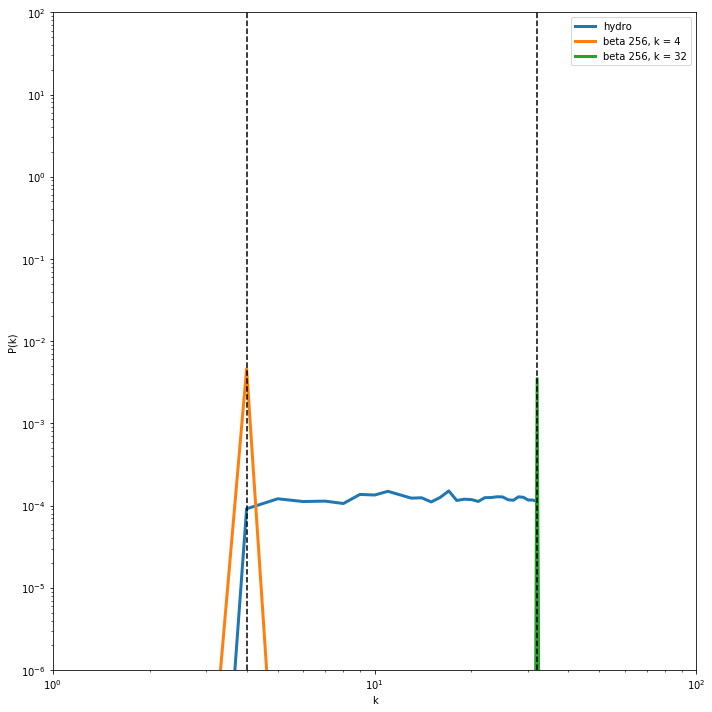

In [28]:
i = 0
ds0 = yt.load('../../simulations/isothermal_tctf_3.0/DD%04d/DD%04d'%(i, i))
ds1 = yt.load('../../simulations/isothermal_tctf_3.0_beta_256.0_k_4.0/DD%04d/DD%04d'%(i, i))
ds2 = yt.load('../../simulations/isothermal_tctf_3.0_beta_256.0_k_32.0/DD%04d/DD%04d'%(i, i))

ds_list = [ds0, ds1, ds2]
label_list = ['hydro', 'beta 256, k = 4', 'beta 256, k = 32']
fig, ax = plt.subplots(figsize = (10,10))

for ds, label in zip(ds_list, label_list):
    k, P_k = doit(ds, 'drho')
    ax.loglog(k, P_k, label = label, linewidth = 3)
    
ax.axvline(4, color = 'black', linestyle = 'dashed')
ax.axvline(32, color = 'black', linestyle = 'dashed')
    
ax.set_xlim(1, 1e2)
ax.set_ylim(1e-6, 1e2)
ax.set_xlabel('k')
ax.set_ylabel('P(k)')
ax.legend()
fig.tight_layout()


yt : [INFO     ] 2019-10-24 13:04:14,138 Parameters: current_time              = 0.2999999114634
yt : [INFO     ] 2019-10-24 13:04:14,140 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-24 13:04:14,141 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-24 13:04:14,142 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-24 13:04:14,143 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-24 13:04:14,154 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-10-24 13:04:15,082 Parameters: current_time              = 0.89999970384451
yt : [INFO     ] 2019-10-24 13:04:15,083 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-24 13:04:15,084 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-24 13:04:15,085 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-24 13:04:15,086 Parameters: cosmological_

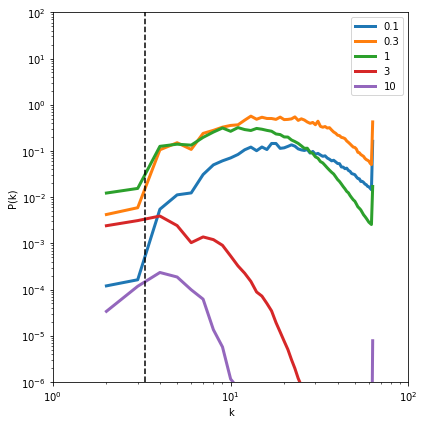

In [31]:
output_list = 5*[30]
tctf_list   = [0.1, 0.3, 1, 3, 10]
beta_list   = ['inf', 'inf', 'inf', 'inf', 'inf', 'inf']
#beta_list  = 5*[4]

label_list = tctf_list


plot_power_spectrum('drho', output_list = output_list, tctf_list = tctf_list, beta_list = beta_list, \
                    label_list = label_list)

In [21]:
ad = ds.all_data()
ad[('sound_speed')].in_units('km/s')
reg = ds.r[:, :, 1]
#reg[('gas', 'z')].in_units('kpc')
cs = np.mean(reg[('gas', 'sound_speed')].in_units('code_velocity'))

lh = 1 * cs
kh = 6 / lh
print(lh, kh)


1.8260204558228703 code_velocity 3.2858339460913566 1/code_velocity


yt : [INFO     ] 2019-10-24 10:53:21,243 Parameters: current_time              = 0
yt : [INFO     ] 2019-10-24 10:53:21,244 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-24 10:53:21,245 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-24 10:53:21,246 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-24 10:53:21,247 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-24 10:53:21,279 Gathering a field list (this may take a moment.)


(65, 65, 65) (65, 65, 65)


yt : [INFO     ] 2019-10-24 10:53:22,690 Parameters: current_time              = 0.99999940040855
yt : [INFO     ] 2019-10-24 10:53:22,691 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-24 10:53:22,692 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-24 10:53:22,693 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-24 10:53:22,694 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-24 10:53:22,789 Gathering a field list (this may take a moment.)


(65, 65, 65) (65, 65, 65)


yt : [INFO     ] 2019-10-24 10:53:24,092 Parameters: current_time              = 2.4999990107796
yt : [INFO     ] 2019-10-24 10:53:24,093 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-24 10:53:24,094 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-24 10:53:24,094 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-24 10:53:24,095 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-24 10:53:24,129 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-10-24 10:53:25,360 Parameters: current_time              = 4.9999990040073
yt : [INFO     ] 2019-10-24 10:53:25,361 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-24 10:53:25,362 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-24 10:53:25,363 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-24 10:53:25,363 Parameters: cosmological_s

(65, 65, 65) (65, 65, 65)
(65, 65, 65) (65, 65, 65)


yt : [INFO     ] 2019-10-24 10:53:26,624 Parameters: current_time              = 7.4999990071086
yt : [INFO     ] 2019-10-24 10:53:26,624 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-24 10:53:26,625 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-24 10:53:26,626 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-24 10:53:26,627 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-24 10:53:26,647 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-10-24 10:53:28,025 Parameters: current_time              = 9.9999990020128
yt : [INFO     ] 2019-10-24 10:53:28,026 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-24 10:53:28,027 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-24 10:53:28,028 Parameters: domain_right_edge         = [3. 3. 3.]


(65, 65, 65) (65, 65, 65)


yt : [INFO     ] 2019-10-24 10:53:28,029 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-24 10:53:28,053 Gathering a field list (this may take a moment.)


(65, 65, 65) (65, 65, 65)


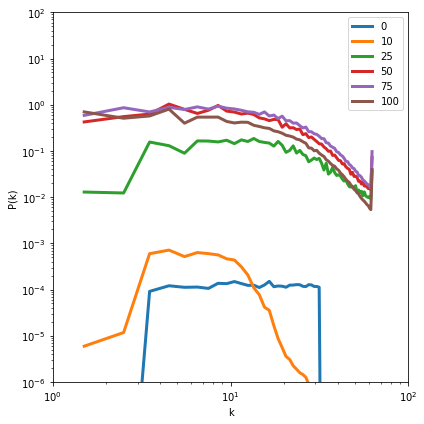

In [51]:


output_list = [0, 10, 25, 50, 75, 100]
tctf_list   = [1, 1,   1,  1,  1,  1]
beta_list   = 6*[4]

label_list = output_list


plot_power_spectrum('drho', output_list = output_list, tctf_list = tctf_list, beta_list = beta_list, \
                    label_list = label_list)

yt : [INFO     ] 2019-10-24 13:06:15,603 Parameters: current_time              = 24.999990034994
yt : [INFO     ] 2019-10-24 13:06:15,605 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-24 13:06:15,606 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-24 13:06:15,607 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-24 13:06:15,608 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-24 13:06:15,624 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-10-24 13:06:17,134 Parameters: current_time              = 24.999990164427
yt : [INFO     ] 2019-10-24 13:06:17,135 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-24 13:06:17,136 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-24 13:06:17,137 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-24 13:06:17,138 Parameters: cosmological_s

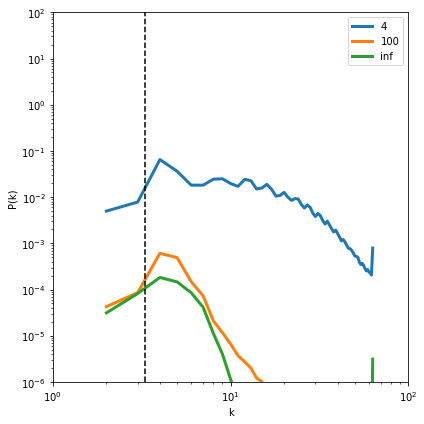

In [32]:
output_list = 3*[25]
tctf_list   = 3*[10]
beta_list   = [4, 100, 'inf']

label_list = beta_list


plot_power_spectrum('drho', output_list = output_list, tctf_list = tctf_list, beta_list = beta_list, \
                    label_list = label_list)

yt : [INFO     ] 2019-10-24 10:15:17,085 Parameters: current_time              = 0
yt : [INFO     ] 2019-10-24 10:15:17,085 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-24 10:15:17,086 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-24 10:15:17,087 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-24 10:15:17,088 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-24 10:15:17,102 Gathering a field list (this may take a moment.)


2.326525e+16 s
256.1040619182264 dimensionless


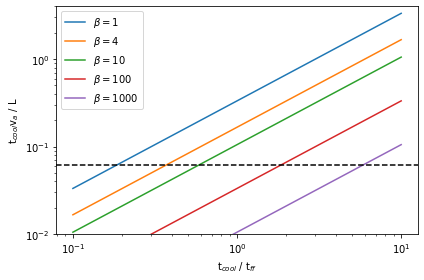

In [2]:
folder = 'isothermal_tctf_0.1_beta_100.0'
i = 0
ds = yt.load('../../simulations/%s/DD%04d/DD%04d'%(folder, i, i))
ad = ds.all_data()
p1 = ad[('gas', 'pressure')]
time_unit = ds.time_unit
print(time_unit)


tcool_av = ds.arr(6/16, 'code_length')
tcool = 3.0 * ds.time_unit
av = tcool_av / tcool

beta = 2 * p1 / ad[('gas','density')] / av**2
print(np.mean(beta))


for beta in [1, 4, 10, 100, 1000]:
    tctf_list = [0.1, 0.3, 1.0, 3, 10]
    tcool_av_list = []
    for tctf in tctf_list:
        tcool = tctf * time_unit
        av =  (np.sqrt(2* p1 / beta / ad[('gas', 'density')])).in_units('cm/s')
        tcool_av = (tcool * av).in_units('code_length') / 6
        tcool_av_list.append(np.mean(tcool_av))
    plt.loglog(tctf_list, tcool_av_list, label = '$\\beta = %i$'%beta)
    
plt.axhline(1/16, linestyle = 'dashed', color = 'black')
plt.xlabel('t$_{cool}$ / t$_{ff}$')
plt.ylabel('t$_{cool}$v$_a$ / L')
plt.ylim(1e-2, 4)
plt.legend()
plt.tight_layout()
plt.savefig('tcool_va_tctff.png', dpi = 300)



yt : [INFO     ] 2019-10-24 07:40:41,529 Parameters: current_time              = 29.999997014983
yt : [INFO     ] 2019-10-24 07:40:41,530 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-24 07:40:41,531 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-24 07:40:41,532 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-24 07:40:41,533 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-24 07:40:41,557 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-10-24 07:40:42,390 xlim = -3.000000 3.000000
yt : [INFO     ] 2019-10-24 07:40:42,392 ylim = -3.000000 3.000000
yt : [INFO     ] 2019-10-24 07:40:42,393 xlim = -3.000000 3.000000
yt : [INFO     ] 2019-10-24 07:40:42,394 ylim = -3.000000 3.000000
yt : [INFO     ] 2019-10-24 07:40:42,396 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2019-10-24 07:40:42,418 Making a fixed resolution bu

0


yt : [INFO     ] 2019-10-24 07:40:46,457 Making a fixed resolution buffer of (y) 800 by 800


1


yt : [INFO     ] 2019-10-24 07:40:46,841 Projection completed
yt : [INFO     ] 2019-10-24 07:40:46,848 Making a fixed resolution buffer of (z) 800 by 800
yt : [INFO     ] 2019-10-24 07:40:47,213 Projection completed
yt : [INFO     ] 2019-10-24 07:40:47,221 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2019-10-24 07:40:47,445 Making a fixed resolution buffer of (('gas', 'pressure')) 800 by 800
yt : [INFO     ] 2019-10-24 07:40:47,698 Projection completed


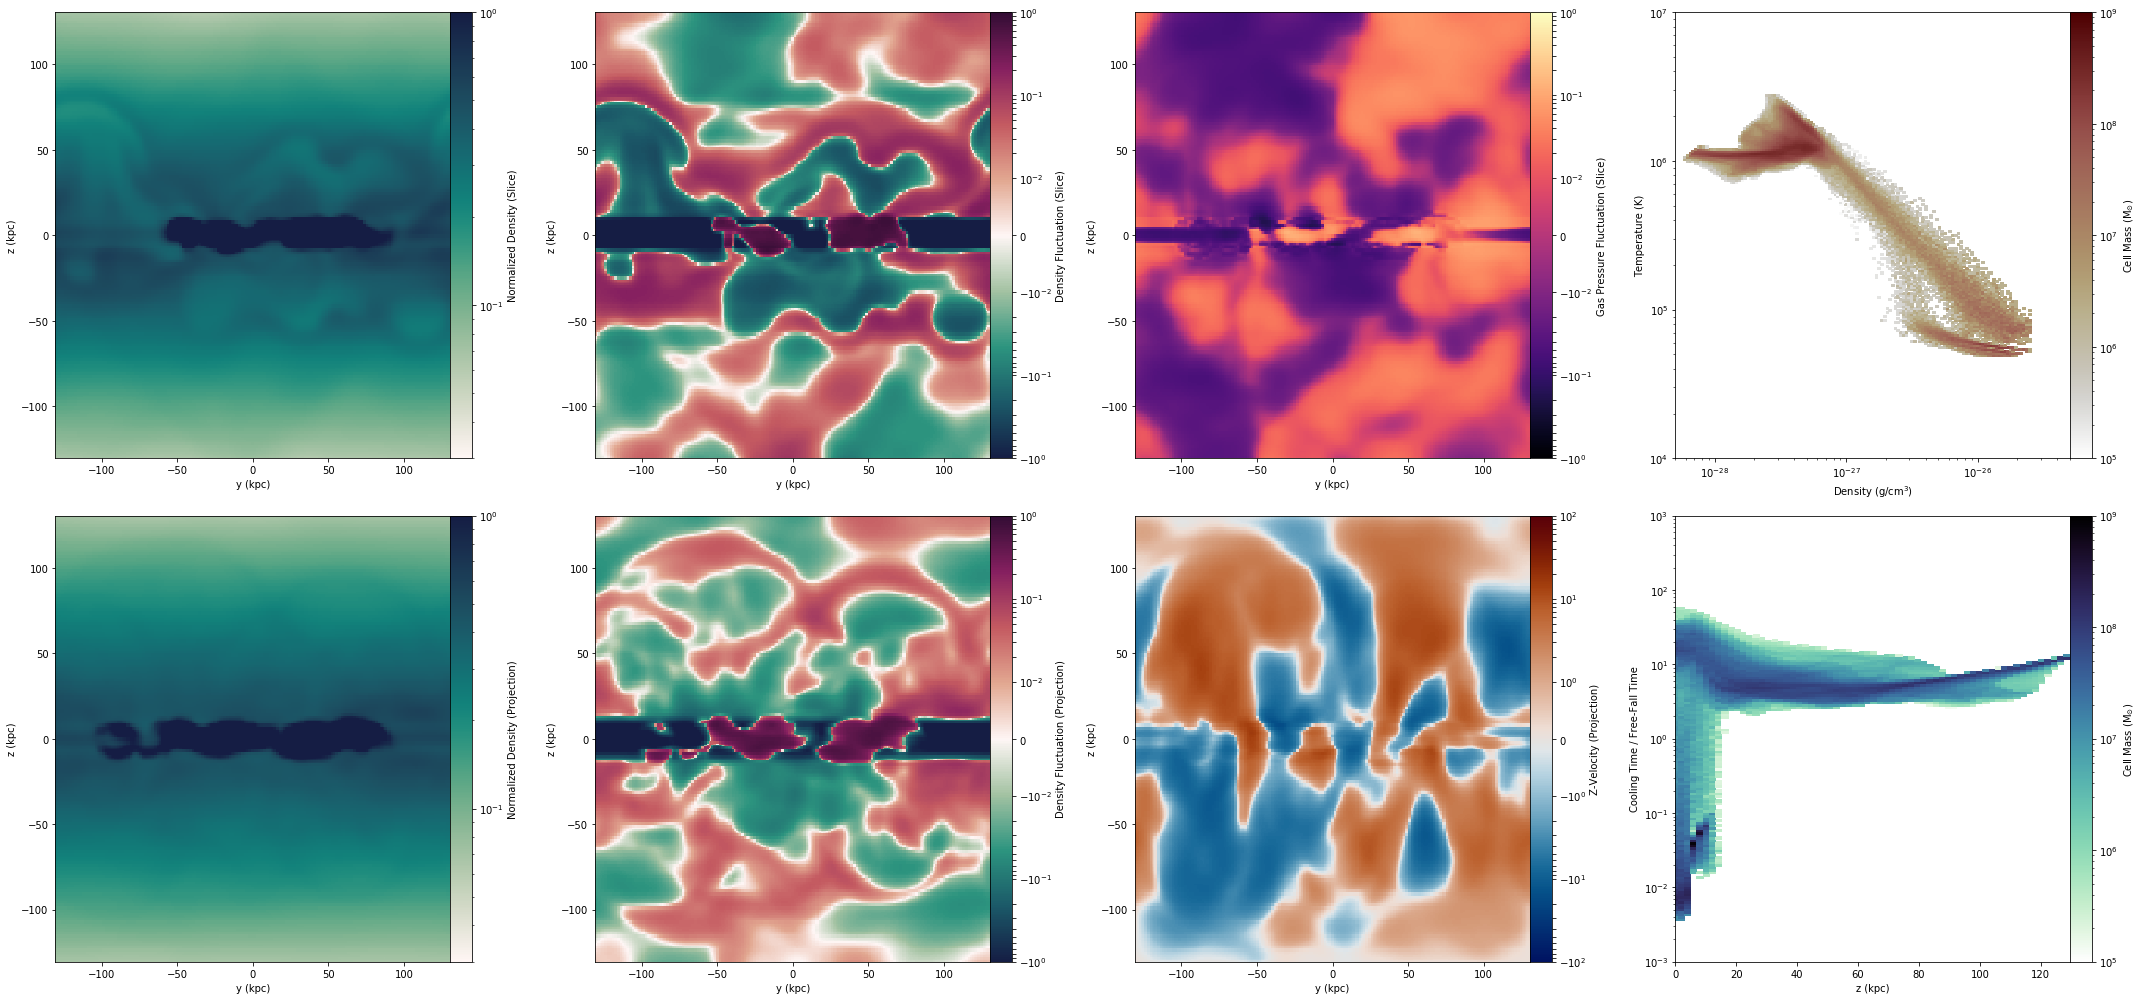

In [11]:
folder = 'isothermal_tctf_3.0_beta_256.0_k_4.0'
folder = 'isothermal_tctf_3.0_beta_256.0_k_32.0'

#folder = 'isentropic_tctf_3.0_beta_256.0_k_4.0'
#folder = 'isentropic_tctf_3.0_beta_256.0_k_32.0'

half_range = 1
rho0 = 1e-27
view = 'x'

for i in [100]:
    ds = ytf.load('../../simulations/%s/DD%04d/DD%04d'%(folder, i, i))
    fig, ax = pt.plot_density_slices(ds)
    


In [41]:
ad = ds.all_data()
ad[('gas', 'plasma_beta')]


YTArray([3.97185492, 3.96601241, 3.97141603, ..., 4.00427732, 3.99310863,
         3.98083706]) (dimensionless)

yt : [INFO     ] 2019-10-17 12:43:19,651 Parameters: current_time              = 8.4999990045463
yt : [INFO     ] 2019-10-17 12:43:19,652 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-17 12:43:19,653 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-17 12:43:19,654 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-17 12:43:19,655 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-17 12:43:19,677 Gathering a field list (this may take a moment.)
/simons/scratch/ibutsky/thermal_instabilities/analysis/yt_functions.py:39: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  display_name = 'External Acceleration Z', units = 'cm/s**2')
/simons/scratch/ibutsky/thermal_instabilities/analysis/yt_functions.py:42: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  display_name = 'Free Fall Time', units = 's')
/simo


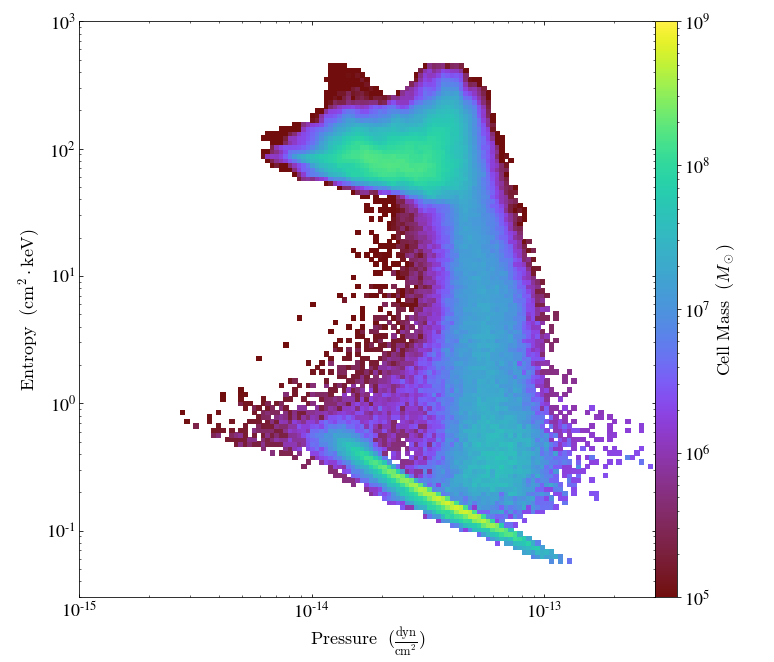

In [53]:
folder = 'isentropic_tctf_1.0'
folder = 'isothermal_tctf_1.0'
i = 85
ds = ytf.load('../../simulations/%s/DD%04d/DD%04d'%(folder, i, i))
ad = ds.all_data()

xfield = ('gas', 'pressure')
yfield = ('gas', 'entropy')
zfield = ('gas', 'cell_mass')
ph = yt.PhasePlot(ad, xfield, yfield, zfield, weight_field = None)
ph.set_unit(zfield, 'Msun')
ph.set_zlim(zfield, 1e5, 1e9)

ph.set_xlim(1e-15, 3e-13)
ph.set_ylim(3e-2, 1e3)
ph.show()

In [15]:
low = ds.domain_left_edge
dims = [128, 128, 128]
cube = ds.covering_grid(0, left_edge = ds.domain_left_edge, dims = dims, \
                        fields = [('gas', 'density'), ('gas', 'thermal_energy')])
                        

In [102]:
rho = cube[('gas', 'density')]

In [104]:
nx, ny, nz = rho.shape

In [105]:
nx

128